# Employee turnover prediction

## EDA, feature importance analysis

In [73]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import mutual_info_score

In [74]:
df = pd.read_csv("../cleaned_employee_churn_data.csv")

**Visualization**

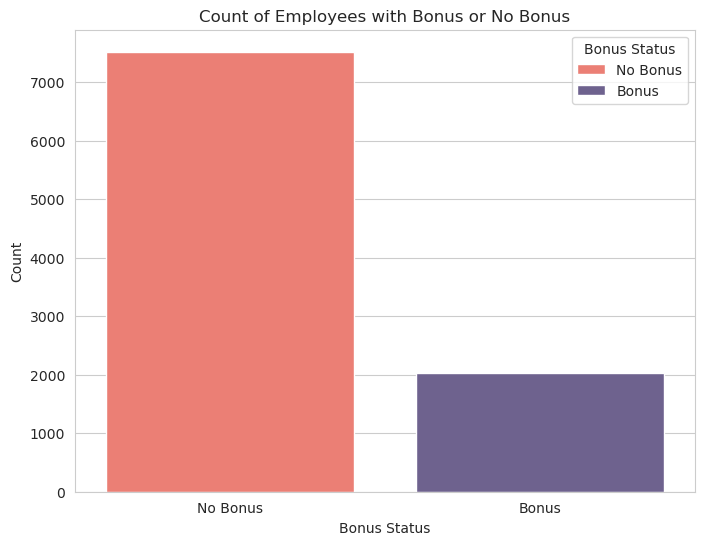

In [75]:
# Set up the plot size and style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the count plot using Seaborn
sns.countplot(x='bonus', data=df, hue='bonus', palette=['#FF6F61', '#6B5B95'], dodge=False)

# Customize plot labels and legend
plt.xlabel("Bonus Status")
plt.ylabel("Count")
plt.title("Count of Employees with Bonus or No Bonus")
plt.xticks([0, 1], ['No Bonus', 'Bonus'])  # Renaming x-ticks for clarity

# Add a custom legend
plt.legend(title="Bonus Status", labels=['No Bonus', 'Bonus'], loc='upper right')

# Show the plot
plt.show()

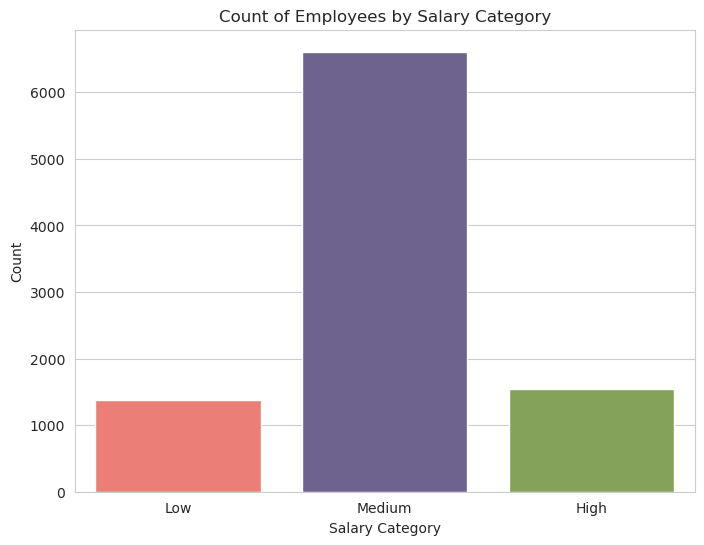

In [76]:
# Set up the plot size and style
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create the count plot using Seaborn for salary categories
sns.countplot(x='salary', data=df, hue='salary', palette=['#FF6F61', '#6B5B95', '#88B04B'])

# Customize plot labels
plt.xlabel("Salary Category")
plt.ylabel("Count")
plt.title("Count of Employees by Salary Category")
plt.xticks([0, 1, 2], ['Low', 'Medium', 'High'])  # Renaming x-ticks for clarity

# Show the plot
plt.show()

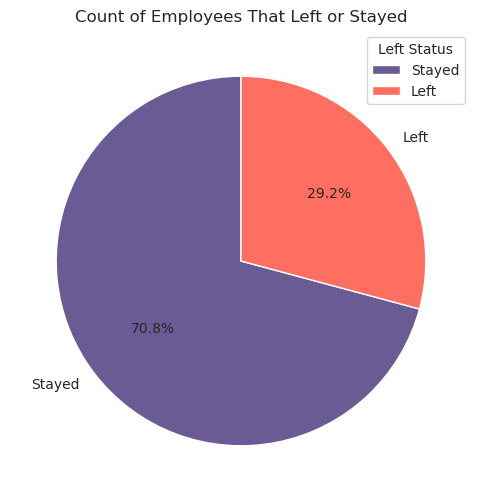

In [77]:
# Summarize the data into counts
counts = df['left'].value_counts()

# Define labels for the pie chart
labels = ['Stayed', 'Left']

# Define colors for the pie chart
colors = ['#6B5B95', '#FF6F61']

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Customize the plot
plt.title("Count of Employees That Left or Stayed")

# Add a custom legend
plt.legend(title="Left Status", labels=['Stayed', 'Left'], loc='upper right')

# Show the plot
plt.show()

**Exploratory data analysis**

In [78]:
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,left
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571,0.291824
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831,0.454626
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060,0.000000
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085,0.000000
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796,0.000000
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708,1.000000
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656,1.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 745.4+ KB


**Filtering the dataset**

In [80]:
categorical = ['department', 'salary']
numerical = ['promoted', 'review', 'projects', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month']

In [81]:
correlation_matrix = df[numerical].corr()

In [82]:
print(correlation_matrix)

               promoted    review  projects    tenure  satisfaction     bonus  \
promoted       1.000000  0.001879  0.010107  0.001410     -0.011704  0.001072   
review         0.001879  1.000000  0.000219 -0.184133     -0.349778 -0.003627   
projects       0.010107  0.000219  1.000000  0.022596      0.002714  0.002654   
tenure         0.001410 -0.184133  0.022596  1.000000     -0.146246 -0.000392   
satisfaction  -0.011704 -0.349778  0.002714 -0.146246      1.000000  0.000704   
bonus          0.001072 -0.003627  0.002654 -0.000392      0.000704  1.000000   
avg_hrs_month -0.002190 -0.196096  0.021299  0.978618     -0.143142 -0.000370   

               avg_hrs_month  
promoted           -0.002190  
review             -0.196096  
projects            0.021299  
tenure              0.978618  
satisfaction       -0.143142  
bonus              -0.000370  
avg_hrs_month       1.000000  


In [83]:
df[categorical].nunique()

department    10
salary         3
dtype: int64

In [84]:
df[numerical].nunique()

promoted            2
review           9540
projects            4
tenure             11
satisfaction     9540
bonus               2
avg_hrs_month    9540
dtype: int64

In [85]:
df[numerical]

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
0,0,0.577569,3,5.0,0.626759,0,180.866070
1,0,0.751900,3,6.0,0.443679,0,182.708149
2,0,0.722548,3,6.0,0.446823,0,184.416084
3,0,0.675158,4,8.0,0.440139,0,188.707545
4,0,0.676203,3,5.0,0.577607,1,179.821083
...,...,...,...,...,...,...,...
9535,0,0.610988,4,8.0,0.543641,0,188.155738
9536,0,0.746887,3,8.0,0.549048,0,188.176164
9537,0,0.557980,3,7.0,0.705425,0,186.531008
9538,0,0.584446,4,8.0,0.607287,1,187.641370


**Not being promoted affects left status**

In [86]:
promoted_mean = df[df.promoted == 1].left.mean()
not_promoted_mean = df[df.promoted == 0].left.mean()

promoted_mean

0.1972318339100346

In [87]:
not_promoted_mean

0.29477894281699274

**No bonus affects the left status only slightly**

In [88]:
bonus_mean = df[df.bonus == 1].left.mean()
no_bonus_mean = df[df.bonus == 0].left.mean()

bonus_mean

0.28175976272862086

In [89]:
no_bonus_mean

0.2945323932419848

**It seems that those on the medium salary tend to leave more often than those on low salary which is a bit surprising unless we factor in relationship to age and tenure and similar**

In [90]:
salary_high_mean = df[df.salary == 'high'].left.mean()
salary_medium_mean = df[df.salary == 'medium'].left.mean()
salary_low_mean = df[df.salary == 'low'].left.mean()

In [91]:
salary_high_mean

0.28552971576227393

In [92]:
salary_medium_mean

0.2951142036000605

In [93]:
salary_low_mean

0.2831281679942071

**Risk rate for job title does not bring out any significant outliers**

In [94]:
global_mean = df.left.mean()
df_group = df.groupby(by='department').left.agg(['mean'])   
df_group['diff'] = df_group['mean'] - global_mean      
df_group['risk'] = df_group['mean'] / global_mean

df_group

,mean,diff,risk
department,,,
admin,0.281324,-0.010500,0.964019
engineering,0.288259,-0.003565,0.987783
finance,0.268657,-0.023167,0.920612
it,0.308989,0.017165,1.058819
logistics,0.308333,0.016509,1.056573
marketing,0.302993,0.011169,1.038272
operations,0.286465,-0.005359,0.981637
retail,0.305646,0.013822,1.047363
sales,0.285183,-0.006641,0.977244


**As we hypothesized before larger tenure signifies that the person will stay while shorter tenure signifies that the person is more likely to leave.**

In [95]:
global_mean = df.left.mean()
df_group = df.groupby(by='tenure').left.agg(['mean'])   
df_group['diff'] = df_group['mean'] - global_mean      
df_group['risk'] = df_group['mean'] / global_mean

df_group

,mean,diff,risk
tenure,,,
2.0,0.666667,0.374843,2.284483
3.0,0.526316,0.234492,1.803539
4.0,0.359073,0.067249,1.230445
5.0,0.234778,-0.057046,0.804519
6.0,0.206658,-0.085166,0.708160
7.0,0.372567,0.080743,1.276684
8.0,0.435911,0.144087,1.493747
9.0,0.024221,-0.267602,0.083000
10.0,0.000000,-0.291824,0.000000


**Salary differences do not apper to have much effect**

In [96]:
global_mean = df.left.mean()
df_group = df.groupby(by='salary').left.agg(['mean'])   
df_group['diff'] = df_group['mean'] - global_mean      
df_group['risk'] = df_group['mean'] / global_mean

df_group

,mean,diff,risk
salary,,,
high,0.285530,-0.006294,0.978432
low,0.283128,-0.008696,0.970202
medium,0.295114,0.003290,1.011275


**Maybe it's a bit unwise to calculate Mutual information on numerical values, but in this case it looks like the mathematical function displayed what is one of the most important columns in relationship to left and that is satisfaction. More unsatisfied employees are more likely to leave and satisfied to stay. Pretty self explanatory.**

In [97]:
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=UserWarning)

def calculate_mi(series):        
    return mutual_info_score(series, df.left)
df_mi = df[numerical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')   
df_mi

,MI
satisfaction,0.603777
review,0.603777
avg_hrs_month,0.603777
tenure,0.040973
promoted,0.000729
projects,0.000079
bonus,0.000066


In [98]:
def calculate_mi(series):        
    return mutual_info_score(series, df.left)
df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')   
df_mi

,MI
department,0.000257
salary,0.000060
